In [22]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f

In [23]:
problem = tsplib95.load("a280.tsp")
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [24]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


32835.35814311415

In [25]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(264, 158), (158, 45), (45, 65), (65, 257), (257, 191), (191, 70), (70, 77), (77, 275), (275, 224), (224, 201), (201, 252), (252, 68), (68, 50), (50, 27), (27, 63), (63, 24), (24, 232), (232, 126), (126, 21), (21, 52), (52, 117), (117, 9), (9, 133), (133, 271), (271, 104), (104, 274), (274, 76), (76, 216), (216, 213), (213, 248), (248, 2), (2, 6), (6, 98), (98, 243), (243, 59), (59, 258), (258, 96), (96, 95), (95, 180), (180, 100), (100, 169), (169, 128), (128, 272), (272, 140), (140, 41), (41, 55), (55, 106), (106, 273), (273, 181), (181, 242), (242, 150), (150, 220), (220, 237), (237, 69), (69, 110), (110, 138), (138, 131), (131, 208), (208, 17), (17, 122), (122, 112), (112, 241), (241, 32), (32, 218), (218, 203), (203, 193), (193, 263), (263, 182), (182, 261), (261, 28), (28, 236), (236, 184), (184, 239), (239, 141), (141, 87), (87, 279), (279, 244), (244, 205), (205, 171), (171, 217), (217, 215), (215, 229), (229, 88), (88, 34), (34, 276), (276, 225), (225,

In [26]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

2586.7696475631606


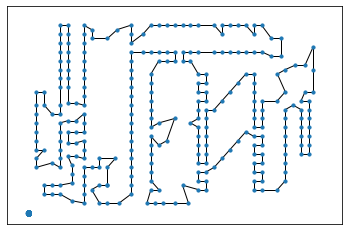

In [27]:
solution = tsplib95.load("a280.opt.tour").tours[0]
solution = get_edge_list(solution)
nx.draw_networkx(G, with_labels=False, node_size=10, edgelist=[])
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=10, edgelist=solution)
print(get_fitness(solution))

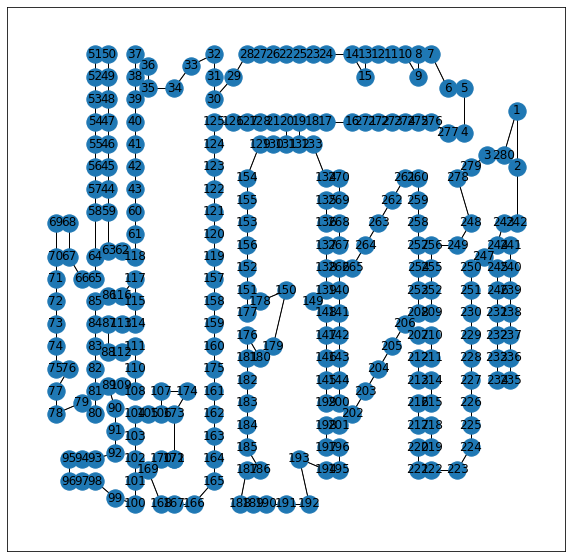

In [28]:
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=solution, ax=axs)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs)
nx.draw_networkx_nodes(G, pos=dictionary, node_size=100,ax=axs)


In [29]:
p1 = f.generate_random_inividual(G)
p2 = f.generate_random_inividual(G)

child = f.crossover(p1.get_path(), p2.get_path())

f.plot_figure(G, p1.edge_list,name="parent1.jpg")
f.plot_figure(G, p2.edge_list,name="parent2.jpg")
f.plot_figure(G, f.get_edge_list(child),name="child.jpg")


<Figure size 432x288 with 0 Axes>

3445.8409022492538


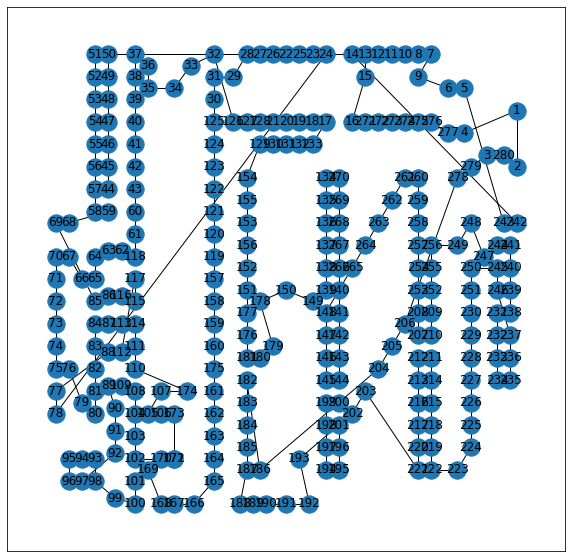

In [30]:
path = f.closest_neighbour_alg(G)
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=f.get_edge_list(path), ax=axs)
print(f.get_fitness(G,f.get_edge_list(path)))
# 0 not in [2]
# G.nodes[3]